<a href="https://colab.research.google.com/github/JianchaoSun/learning_machine_learning/blob/master/Dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
#import matplot as plt
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype('float32')/255
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float')/255

train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               131584    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 337,674
Trainable params: 337,674
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/6
59584/60000 [============================>.] - ETA: 0s

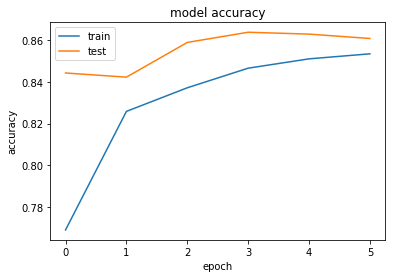

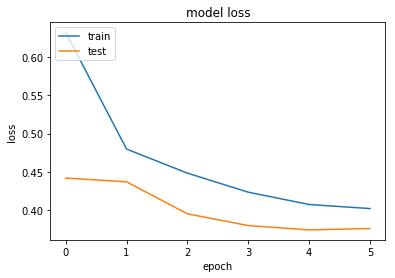

In [3]:
from time import time
network = tf.keras.models.Sequential()
network.add(tf.keras.layers.Dense(256,activation = 'relu', input_shape = (28*28,)))
#every layer specify a drop out
network.add(tf.keras.layers.Dropout(0.5))
network.add(tf.keras.layers.Dense(512,activation = 'relu'))
network.add(tf.keras.layers.Dropout(0.5))
network.add(tf.keras.layers.Dense(10,activation = 'softmax'))
network.summary()
network.compile(loss='categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
#tensorboard = tf.keras.callbacks.TensorBoard(log_dir='logs/{}'.format(time()))

#add model check point to save best performance, and tensorboard
checkpoint = tf.keras.callbacks.ModelCheckpoint('Users\jianchaosun⁩\⁨Downloads⁩\savepoint\b1.h5', monitor='val_acc', verbose=1, save_best_only=True)
tensorboard = tf.keras.callbacks.TensorBoard(log_dir='logs2/{}'.format(time()),write_graph=True, write_grads=True, write_images=True)
     
history = network.fit(train_images, train_labels, batch_size = 64, epochs = 6, validation_data = (test_images, test_labels),callbacks=[tensorboard,checkpoint])


import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()